In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
import src.resource_sharing_model as rsm
import src.evaluation_metrics as em

In [2]:
# random seed
np.random.seed(0)
wts_matrix = np.random.rand(100, 100)
inventory = np.random.rand(100, 1) * 10
isolation_day = 7
model = rsm.ResourceSharingModel(wts_matrix, inventory, isolation_day)
model.solve()

print("Inventory: \n", model.inventory)
print("Extra resource: \n", model.extra_resource)
print("Needed resource: \n", model.needed_resource)
print("Shared resource: \n", model.shared_resource)
print("Recieved resource: \n", model.recieved_resource)
print("Final resource: \n", model.resource)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-25
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 200 rows, 10000 columns and 20000 nonzeros
Model fingerprint: 0x1bbeb9e9
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 7e+00]
Presolve removed 100 rows and 7789 columns
Presolve time: 0.00s
Presolved: 100 rows, 2211 columns, 4422 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.4692927e+01   7.770679e+00   0.000000e+00      0s
      10    5.4644800e+01   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.464479960e+01
Inventory: 
 [[7.48267981]
 [1.80202707]
 [3.89023145]
 [0.37600182]
 [0.11787739]
 [9

(0.0, 10.0)

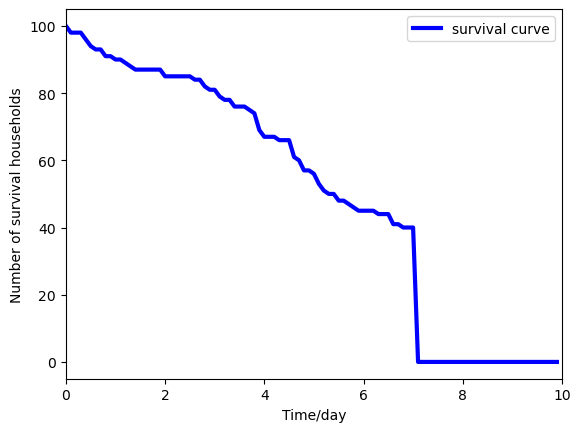

In [3]:
# The survival curve of the first week
t = np.arange(0, 10, 0.1)
plt.plot(t, em.get_survival_curve(model.resource, t), color='b', linewidth=3, label='survival curve')
plt.xlabel('Time/day')
plt.ylabel('Number of survival households')
plt.legend()
plt.xlim(0, 10)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 200 rows, 10000 columns and 20000 nonzeros
Model fingerprint: 0x4668e482
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 6e+00]
Presolve removed 100 rows and 7644 columns
Presolve time: 0.00s
Presolved: 100 rows, 2356 columns, 4712 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.8988825e+01   3.402943e+01   0.000000e+00      0s
      32    8.8577554e+01   0.000000e+00   0.000000e+00      0s

Solved in 32 iterations and 0.01 seconds (0.00 work units)
Optimal objective  8.857755425e+01


(0.0, 10.0)

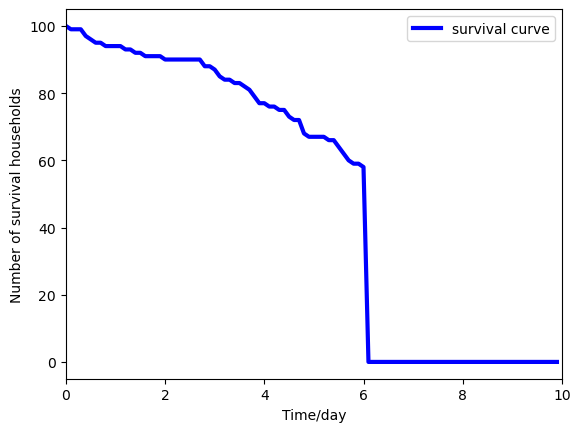

In [4]:
# random seed
np.random.seed(0)
wts_matrix = np.random.rand(100, 100)
inventory = np.random.rand(100, 1) * 10
isolation_day = 6
model = rsm.ResourceSharingModel(wts_matrix, inventory, isolation_day)
model.solve()

# The survival curve of the first week
t = np.arange(0, 10, 0.1)
plt.plot(t, em.get_survival_curve(model.resource, t), color='b', linewidth=3, label='survival curve')
plt.xlabel('Time/day')
plt.ylabel('Number of survival households')
plt.legend()
plt.xlim(0, 10)

In [5]:
# Case 1: isolation_day = 7
time_stamps = np.arange(0, 10, 0.1)
num_scenarios = 100
scenario_survival_curves1 = np.zeros((num_scenarios, time_stamps.shape[0]))
np.random.seed(0)
for i in range(0, num_scenarios):
    wts_matrix = np.random.rand(100, 100)
    inventory = np.random.rand(100, 1) * 10
    isolation_day = 7
    model = rsm.ResourceSharingModel(wts_matrix, inventory, isolation_day)
    model.solve()
    survival_curve = em.get_survival_curve(model.resource, time_stamps)
    scenario_survival_curves1[i, :] = survival_curve.T
expectect_survival_curve1 = em.get_expected_survival_curve(scenario_survival_curves1)
quantile_survival_curve1 = em.get_quantile_survival_curve(scenario_survival_curves1, 0.1)
# superquantile_survival_curve1 = get_superquantile_survival_curve(scenario_survival_curves1, 0.9)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 200 rows, 10000 columns and 20000 nonzeros
Model fingerprint: 0x1bbeb9e9
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 7e+00]
Presolve removed 100 rows and 7789 columns
Presolve time: 0.01s
Presolved: 100 rows, 2211 columns, 4422 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.4692927e+01   7.770679e+00   0.000000e+00      0s
      10    5.4644800e+01   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.464479960e+01
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a

In [6]:
# Case 2: isolation_day = 5
time_stamps = np.arange(0, 10, 0.1)
num_scenarios = 100
scenario_survival_curves2 = np.zeros((num_scenarios, time_stamps.shape[0]))
np.random.seed(0)
for i in range(0, num_scenarios):
    wts_matrix = np.random.rand(100, 100)
    inventory = np.random.rand(100, 1) * 10
    isolation_day = 5
    model = rsm.ResourceSharingModel(wts_matrix, inventory, isolation_day)
    model.solve()
    survival_curve = em.get_survival_curve(model.resource, time_stamps)
    scenario_survival_curves2[i, :] = survival_curve.T
expectect_survival_curve2 = em.get_expected_survival_curve(scenario_survival_curves2)
quantile_survival_curve2 = em.get_quantile_survival_curve(scenario_survival_curves2, 0.1)
# superquantile_survival_curve2 = get_superquantile_survival_curve(scenario_survival_curves2, 0.9)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 200 rows, 10000 columns and 20000 nonzeros
Model fingerprint: 0xbe80bb18
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 5e+00]
Presolve removed 100 rows and 7516 columns
Presolve time: 0.01s
Presolved: 100 rows, 2484 columns, 4968 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2977753e+02   1.135713e+02   0.000000e+00      0s
     122    1.2668592e+02   0.000000e+00   0.000000e+00      0s

Solved in 122 iterations and 0.02 seconds (0.01 work units)
Optimal objective  1.266859197e+02
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize 

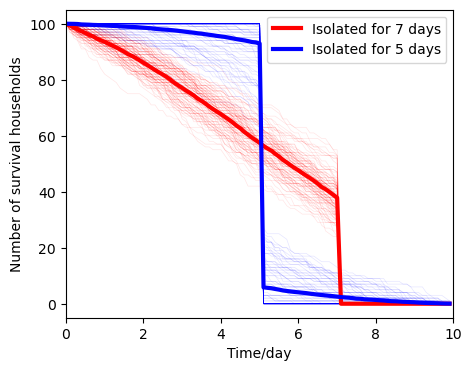

In [7]:
# print the survival curve of the all scenarios
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for i in range(0, num_scenarios):
    plt.plot(time_stamps, scenario_survival_curves1[i, :], color='r', alpha=0.1, linewidth=0.5)
    plt.plot(time_stamps, scenario_survival_curves2[i, :], color='b', alpha=0.1, linewidth=0.5)
plt.plot(time_stamps, expectect_survival_curve1, color='r', linewidth=3, label='Isolated for 7 days')
plt.plot(time_stamps, expectect_survival_curve2, color='b', linewidth=3, label='Isolated for 5 days')
plt.xlabel('Time/day')
plt.ylabel('Number of survival households')
plt.xlim(0, 10)
plt.legend()
plt.savefig('../figs/expected_survival_curves.png', dpi=300, bbox_inches='tight')

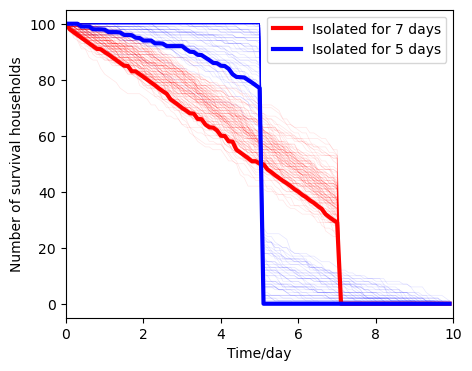

In [8]:
# print the survival curve of the all scenarios
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for i in range(0, num_scenarios):
    plt.plot(time_stamps, scenario_survival_curves1[i, :], color='r', alpha=0.1, linewidth=0.5)
    plt.plot(time_stamps, scenario_survival_curves2[i, :], color='b', alpha=0.1, linewidth=0.5)
plt.plot(time_stamps, quantile_survival_curve1, color='r', linewidth=3, label='Isolated for 7 days')
plt.plot(time_stamps, quantile_survival_curve2, color='b', linewidth=3, label='Isolated for 5 days')
plt.xlabel('Time/day')
plt.ylabel('Number of survival households')
plt.xlim(0, 10)
plt.legend()
plt.savefig('../figs/quantile_survival_curves.png', dpi=300, bbox_inches='tight')

In [9]:
# # This section utilize gurobi as the solver, which could be much faster than scipy.optimize.linprog.
# import gurobi as gp
# from gurobi import GRB

# m = gp.Model()
# x = m.addMVar(shape=np.shape(wts_matrix), vtype=GRB.CONTINUOUS, name='x', lb=0)
# m.setObjective(sum(sum(wts_matrix * x)), GRB.MAXIMIZE)
# m.addConstr(x.sum(axis=1) <= np.reshape(model.extra_resource, -1))
# m.addConstr(x.sum(axis=0) <= np.reshape(model.needed_resource, -1))
# m.write('test.lp')
# m.optimize()
# sol = x.X
# print(sol)